In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [91]:
power_data = pd.read_excel('data/시도별_용도별.xls')
power_data.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
구분,강원,개성,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,합계
주거용,1940933,0,16587710,4260988,3302463,1954876,3151904,1872890,4473510,13131172,384903,1487143,3856852,2284124,2326183,782601,2691823,2027281,64576423
공공용,1400421,0,5533662,1427560,1578115,565527,826396,954681,1305876,3581534,299675,489865,921748,964024,1096968,301727,1089613,1267140,22204112
서비스업,6203749,0,33434551,8667737,8487402,3174973,5470438,3955921,7582169,27647345,645424,3649386,7154416,5690659,4910318,2308732,7164439,4804638,134748546
업무용합계,7604170,0,38968213,10095297,10065517,3740500,6296834,4910602,8888045,31228879,945099,4139251,8076164,6654683,6007286,2610459,8254052,6071778,156952658


In [92]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'])

In [93]:
import platform
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

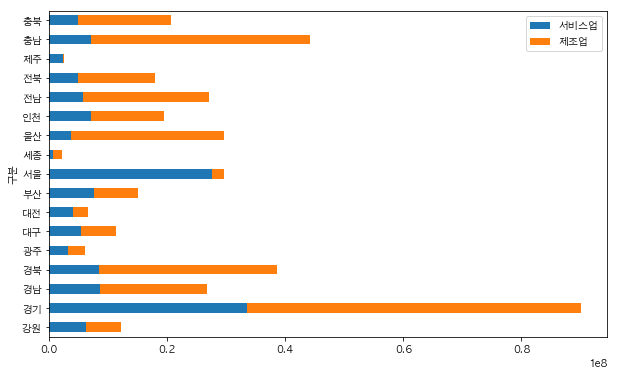

In [94]:
see2 = ['서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked = True)

In [95]:
power2 = power[see2]
power2.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


In [96]:
power2.shape

(17, 2)

In [97]:
power2 = power2.drop(['경기','서울'])
power2

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


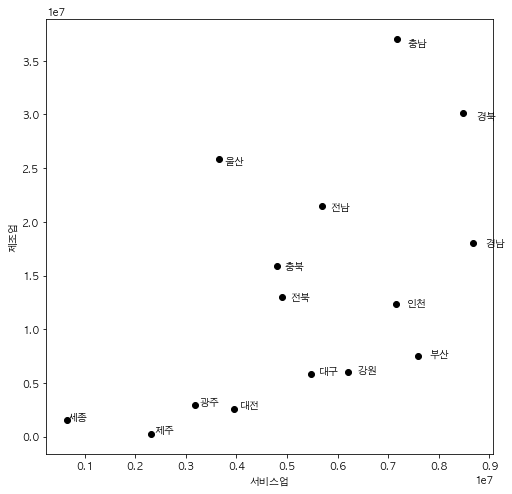

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(power2['서비스업'], power2['제조업'], c='k', marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power2.shape[0]):
    plt.text(power2['서비스업'][n]*1.03, power2['제조업'][n]*0.98,
             power2.index[n])

<function scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')>

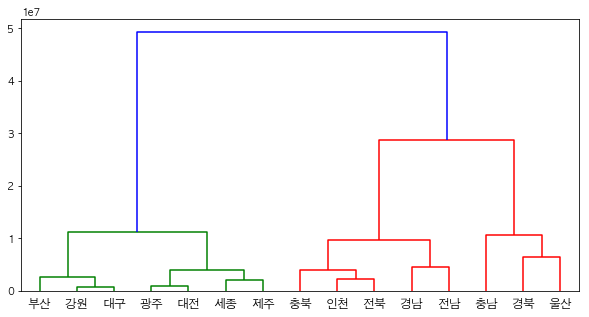

In [99]:
# clustering - dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (10,5))
link_dist = linkage(power2, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power2.index)
dendrogram

In [100]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=3).fit(power2)
print(k.n_clusters)

3


In [101]:
k.labels_

array([0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2], dtype=int32)

In [102]:
power2['클러스터'] = k.labels_
power2

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,0
경남,8667737,18053778,2
경북,8487402,30115601,1
광주,3174973,2910768,0
대구,5470438,5862633,0
대전,3955921,2608343,0
부산,7582169,7512588,0
세종,645424,1502922,0
울산,3649386,25883132,1


In [103]:
 k.cluster_centers_

array([[ 4191629.42857143,  3805868.14285714],
       [ 6433742.33333333, 31018896.        ],
       [ 6245553.6       , 16144968.6       ]])

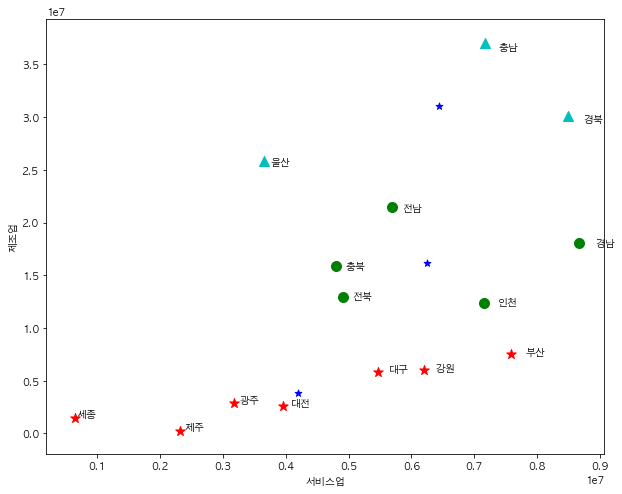

In [104]:
my_markers = ['*','^','o']
my_colors = ['r','c','g']

plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power2.shape[0]):
    label = k.labels_[n]
    plt.scatter(power2['서비스업'][n], power2['제조업'][n], 
                c=my_colors[label], marker=my_markers[label], s=100)
    plt.text(power2['서비스업'][n]*1.03, power2['제조업'][n]*0.98,
             power2.index[n])

centers = k.cluster_centers_
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c='b', s=50, marker='*')

In [105]:
power2 = power2.drop('클러스터', axis=1)
power2.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


## 정규화된 이후에 클러스터링

In [106]:
power3 = power2

In [107]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
power3[['서비스업', '제조업']] = scaler.fit_transform(power3[['서비스업', '제조업']])
power3

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


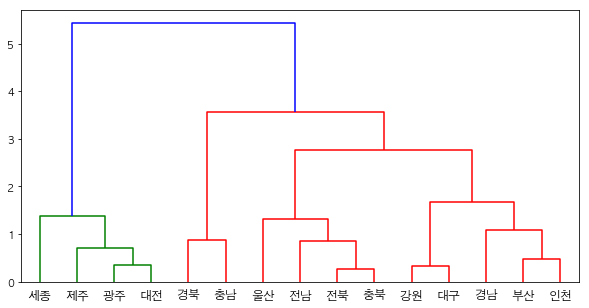

In [109]:
power3 = pd.DataFrame(power2_sc, columns=['서비스업', '제조업'])

plt.figure(figsize = (10,5))
link_dist = linkage(power2, metric='euclidean', method='ward')
dendrogram(link_dist, labels=power2.index)
plt.show()

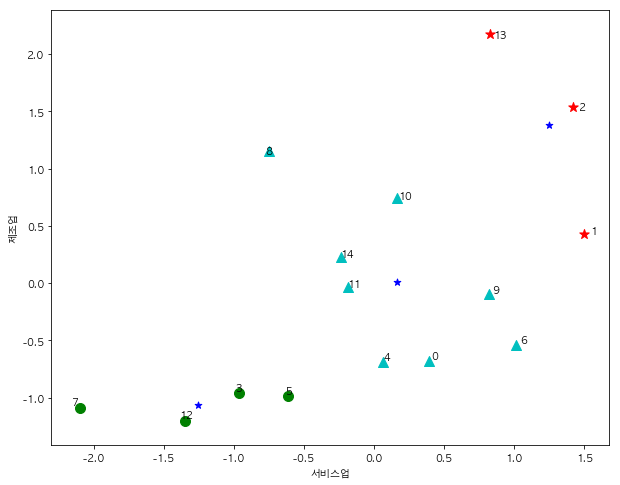

In [110]:
k = KMeans(n_clusters=3).fit(power3)

my_markers = ['*','^','o']
my_colors = ['r','c','g']

plt.figure(figsize=(10,8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power3.shape[0]):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], 
                c=my_colors[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.03, power3['제조업'][n]*0.98,
             power3.index[n])

centers = k.cluster_centers_
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c='b', s=50, marker='*')

In [115]:
power4 = power_data.set_index('구분')
power4.drop(['합계', '개성', '서울', '경기'], inplace=True)
power4.drop(['업무용합계','산업용합계','합계'], axis=1, inplace=True)
power4

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616
대전,1872890,954681,3955921,28643,3326,2608343,204171,41687,4311,539332,...,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252
부산,4473510,1305876,7582169,107927,25289,7512588,532943,528513,51980,27240,...,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104
세종,384903,299675,645424,69469,16364,1502922,110211,70617,1324,350896,...,32345,11390,26185,14319,33539,170366,79009,0,5132,2603
울산,1487143,489865,3649386,80221,20103,25883132,187738,943299,12286,620457,...,4671005,393469,169132,5053,381602,24165,2367150,1020610,4984,1626


In [116]:
scaler = StandardScaler()
power5 = scaler.fit_transform(power4)   # 결과는 array
power5

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-4.47460582e-01,  1.10736258e+00,  3.93991873e-01,
        -3.16151054e-01,  2.74249597e+00, -6.76282009e-01,
        -5.03830175e-02, -6.16387986e-01, -4.51439798e-01,
        -1.06745713e+00, -8.34440395e-01, -7.15647803e-01,
        -3.88092459e-01,  2.94806033e+00, -5.45482466e-01,
        -9.48358638e-01, -8.28940537e-01, -6.56696681e-01,
        -8.30061658e-01, -5.27178394e-01, -9.76345924e-01,
        -3.36181425e-01, -5.56318407e-01, -8.86116555e-01],
       [ 1.57896143e+00,  1.17653431e+00,  1.49834892e+00,
         1.30563225e+00,  8.99358076e-03,  4.31200291e-01,
         8.85979451e-01, -2.51315662e-01, -1.99913054e-01,
         1.02864794e+00,  1.91477693e-01, -3.57560844e-01,
        -2.20823496e-01, -2.91510189e-01,  2.72687784e-01,
         2.64991989e+00,  2.89524796e+00, -2.22753932e-01,
         1.80996346e+00, -3.54694708e-01,  1.28912118e+00,
         3.27934154e+00,  1.11033629e+00,  6.77331689e-01],
       [ 7.41750176e-01,  1.56026803e+00,  1.41752295e

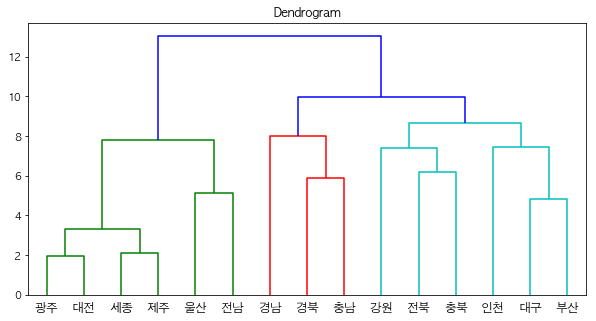

In [120]:
Z = linkage(power5, metric='euclidean', method='ward')
plt.figure(figsize=(10,5))
plt.title("Dendrogram")
dendrogram(Z, labels=power4.index)
plt.show()

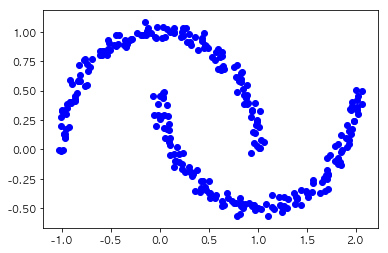

In [133]:
# DBSCAN (eps=, min_samples=, metric=)
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

x, y = make_moons(n_samples=300, noise=0.04, random_state=11)
plt.scatter(x[:,0], x[:,1], c='b')
plt.show()

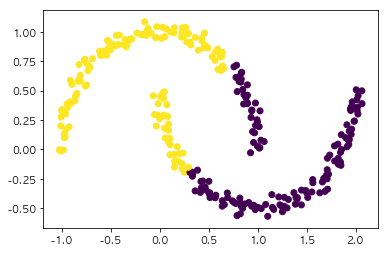

In [134]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=predict)

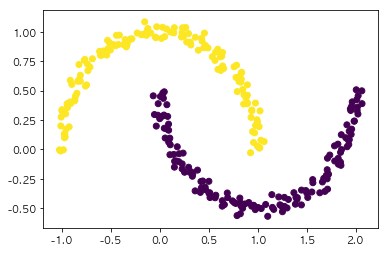

In [145]:
dbscan = DBSCAN(eps=0.2 , min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=predict)

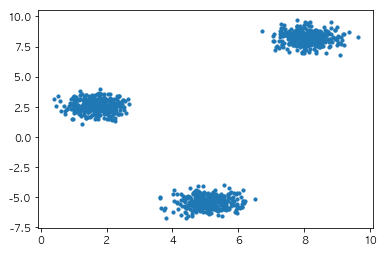

In [150]:
# one more example
from sklearn.datasets import make_blobs

x, y = make_blobs(n_features=2, n_samples=1000, cluster_std=0.5)
plt.scatter(x[:,0], x[:,1], s=10)

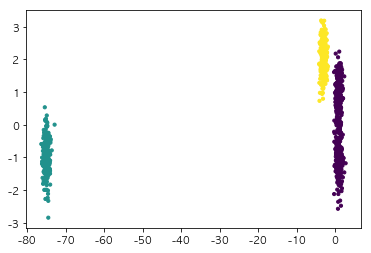

In [159]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
plt.scatter(x[:,0], x[:,1], c=kmeans.predict(x), s=10)

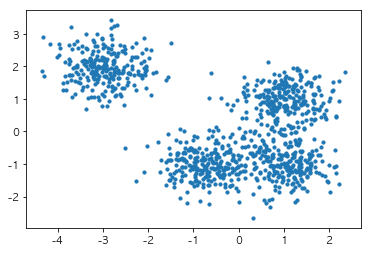

In [163]:
centers = [[1,1],[-.75,-1],[1,-1],[-3,2]]
x, _ = make_blobs(n_samples=1000, cluster_std=0.5, centers=centers)
plt.scatter(x[:,0], x[:,1], s=10)

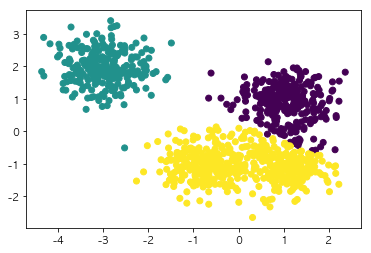

In [164]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
plt.scatter(x[:,0], x[:,1], c=kmeans.predict(x))

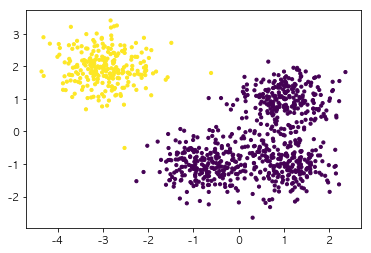

In [165]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(x)
plt.scatter(x[:,0], x[:,1], s=10, c=ms.predict(x))